In [2]:
import pandas as pd 
import numpy as np 
import os 

In [5]:
file_path = r"D:\lokesh\DS\MLops\Vehicle_Insurance\notebook"
data = "data.csv"

In [6]:
def get_data(name):
    data_path = os.path.join(file_path, name)
    return (
        pd.read_csv(data_path)
    )

In [8]:
df = get_data("data.csv")

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


- No missing value in the data 
- Data dypes is correct

#### 3. Preliminary Analysis 

3.1 Check data types 

In [10]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

3.2 Check duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

3.3 Obeservations

- Data Types are correct 
- There is no duplicate in the data 

### Detailed Analysis

Gender

In [15]:
(
    df
    .Gender
    .unique()
)

array(['Male', 'Female'], dtype=object)

Age

In [17]:
(
    df
    .Age
    .unique()
)

array([44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 37, 25, 42, 60, 65, 49,
       34, 51, 26, 57, 79, 48, 45, 72, 30, 54, 27, 38, 22, 78, 20, 39, 62,
       58, 59, 63, 50, 67, 77, 28, 69, 52, 31, 33, 43, 36, 53, 70, 46, 55,
       40, 61, 75, 64, 35, 66, 68, 74, 73, 84, 83, 81, 80, 82, 85])

Driving_License

In [18]:
(
    df
    .Driving_License
    .unique()
)

array([1, 0])

Region_Code

In [21]:
(
    df
    .Region_Code
    .unique()
    
)

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

Previously_Insured

In [23]:
(
    df
    .Previously_Insured
    .unique()
)

array([0, 1])

Vehicle_Age

In [24]:
(
    df
    .Vehicle_Age
    .unique()
)

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

Vehicle_Damage

In [25]:
(
    df
    .Vehicle_Damage
    .unique()
)

array(['Yes', 'No'], dtype=object)

Annual_Premium

In [38]:
(
    df
    .Annual_Premium
    .unique()
    
)

array([ 40454.,  33536.,  38294., ...,  20706., 101664.,  69845.],
      shape=(48838,))

Policy_Sales_Channel

In [35]:
(
    df
    .Policy_Sales_Channel
    .unique()
)

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

Vintage

In [37]:
(
    df
    .Vintage
    .unique()
)

array([217, 183,  27, 203,  39, 176, 249,  72,  28,  80,  46, 289, 221,
        15,  58, 147, 256, 299, 158, 102, 116, 177, 232,  60, 180,  49,
        57, 223, 136, 222, 149, 169,  88, 253, 107, 264, 233,  45, 184,
       251, 153, 186,  71,  34,  83,  12, 246, 141, 216, 130, 282,  73,
       171, 283, 295, 165,  30, 218,  22,  36,  79,  81, 100,  63, 242,
       277,  61, 111, 167,  74, 235, 131, 243, 248, 114, 281,  62, 189,
       139, 138, 209, 254, 291,  68,  92,  52,  78, 156, 247, 275,  77,
       181, 229, 166,  16,  23,  31, 293, 219,  50, 155,  66, 260,  19,
       258, 117, 193, 204, 212, 144, 234, 206, 228, 125,  29,  18,  84,
       230,  54, 123, 101,  86,  13, 237,  85,  98,  67, 128,  95,  89,
        99, 208, 134, 135, 268, 284, 119, 226, 105, 142, 207, 272, 263,
        64,  40, 245, 163,  24, 265, 202, 259,  91, 106, 190, 162,  33,
       194, 287, 292,  69, 239, 132, 255, 152, 121, 150, 143, 198, 103,
       127, 285, 214, 151, 199,  56,  59, 215, 104, 238, 120,  2

Vintage

In [39]:
(
    df
    .Vintage
    .unique()
)

array([217, 183,  27, 203,  39, 176, 249,  72,  28,  80,  46, 289, 221,
        15,  58, 147, 256, 299, 158, 102, 116, 177, 232,  60, 180,  49,
        57, 223, 136, 222, 149, 169,  88, 253, 107, 264, 233,  45, 184,
       251, 153, 186,  71,  34,  83,  12, 246, 141, 216, 130, 282,  73,
       171, 283, 295, 165,  30, 218,  22,  36,  79,  81, 100,  63, 242,
       277,  61, 111, 167,  74, 235, 131, 243, 248, 114, 281,  62, 189,
       139, 138, 209, 254, 291,  68,  92,  52,  78, 156, 247, 275,  77,
       181, 229, 166,  16,  23,  31, 293, 219,  50, 155,  66, 260,  19,
       258, 117, 193, 204, 212, 144, 234, 206, 228, 125,  29,  18,  84,
       230,  54, 123, 101,  86,  13, 237,  85,  98,  67, 128,  95,  89,
        99, 208, 134, 135, 268, 284, 119, 226, 105, 142, 207, 272, 263,
        64,  40, 245, 163,  24, 265, 202, 259,  91, 106, 190, 162,  33,
       194, 287, 292,  69, 239, 132, 255, 152, 121, 150, 143, 198, 103,
       127, 285, 214, 151, 199,  56,  59, 215, 104, 238, 120,  2

Response

In [40]:
(
    df
    .Response
    .unique()
)

array([1, 0])

### Clean data 

In [12]:
def get_clean_data(df:pd.DataFrame) -> pd.DataFrame:

    return (
        df
        
    ) 

In [13]:
get_clean_data(df)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


- Data is cleaned 
- Vehicle_Age has 3 categories those will be handled during encoding

<Axes: >

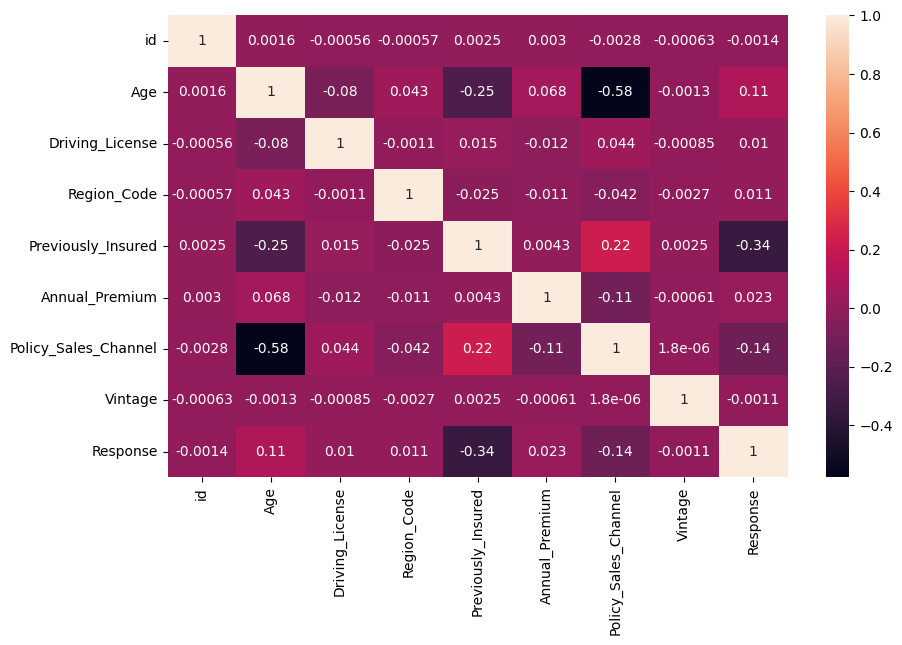

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

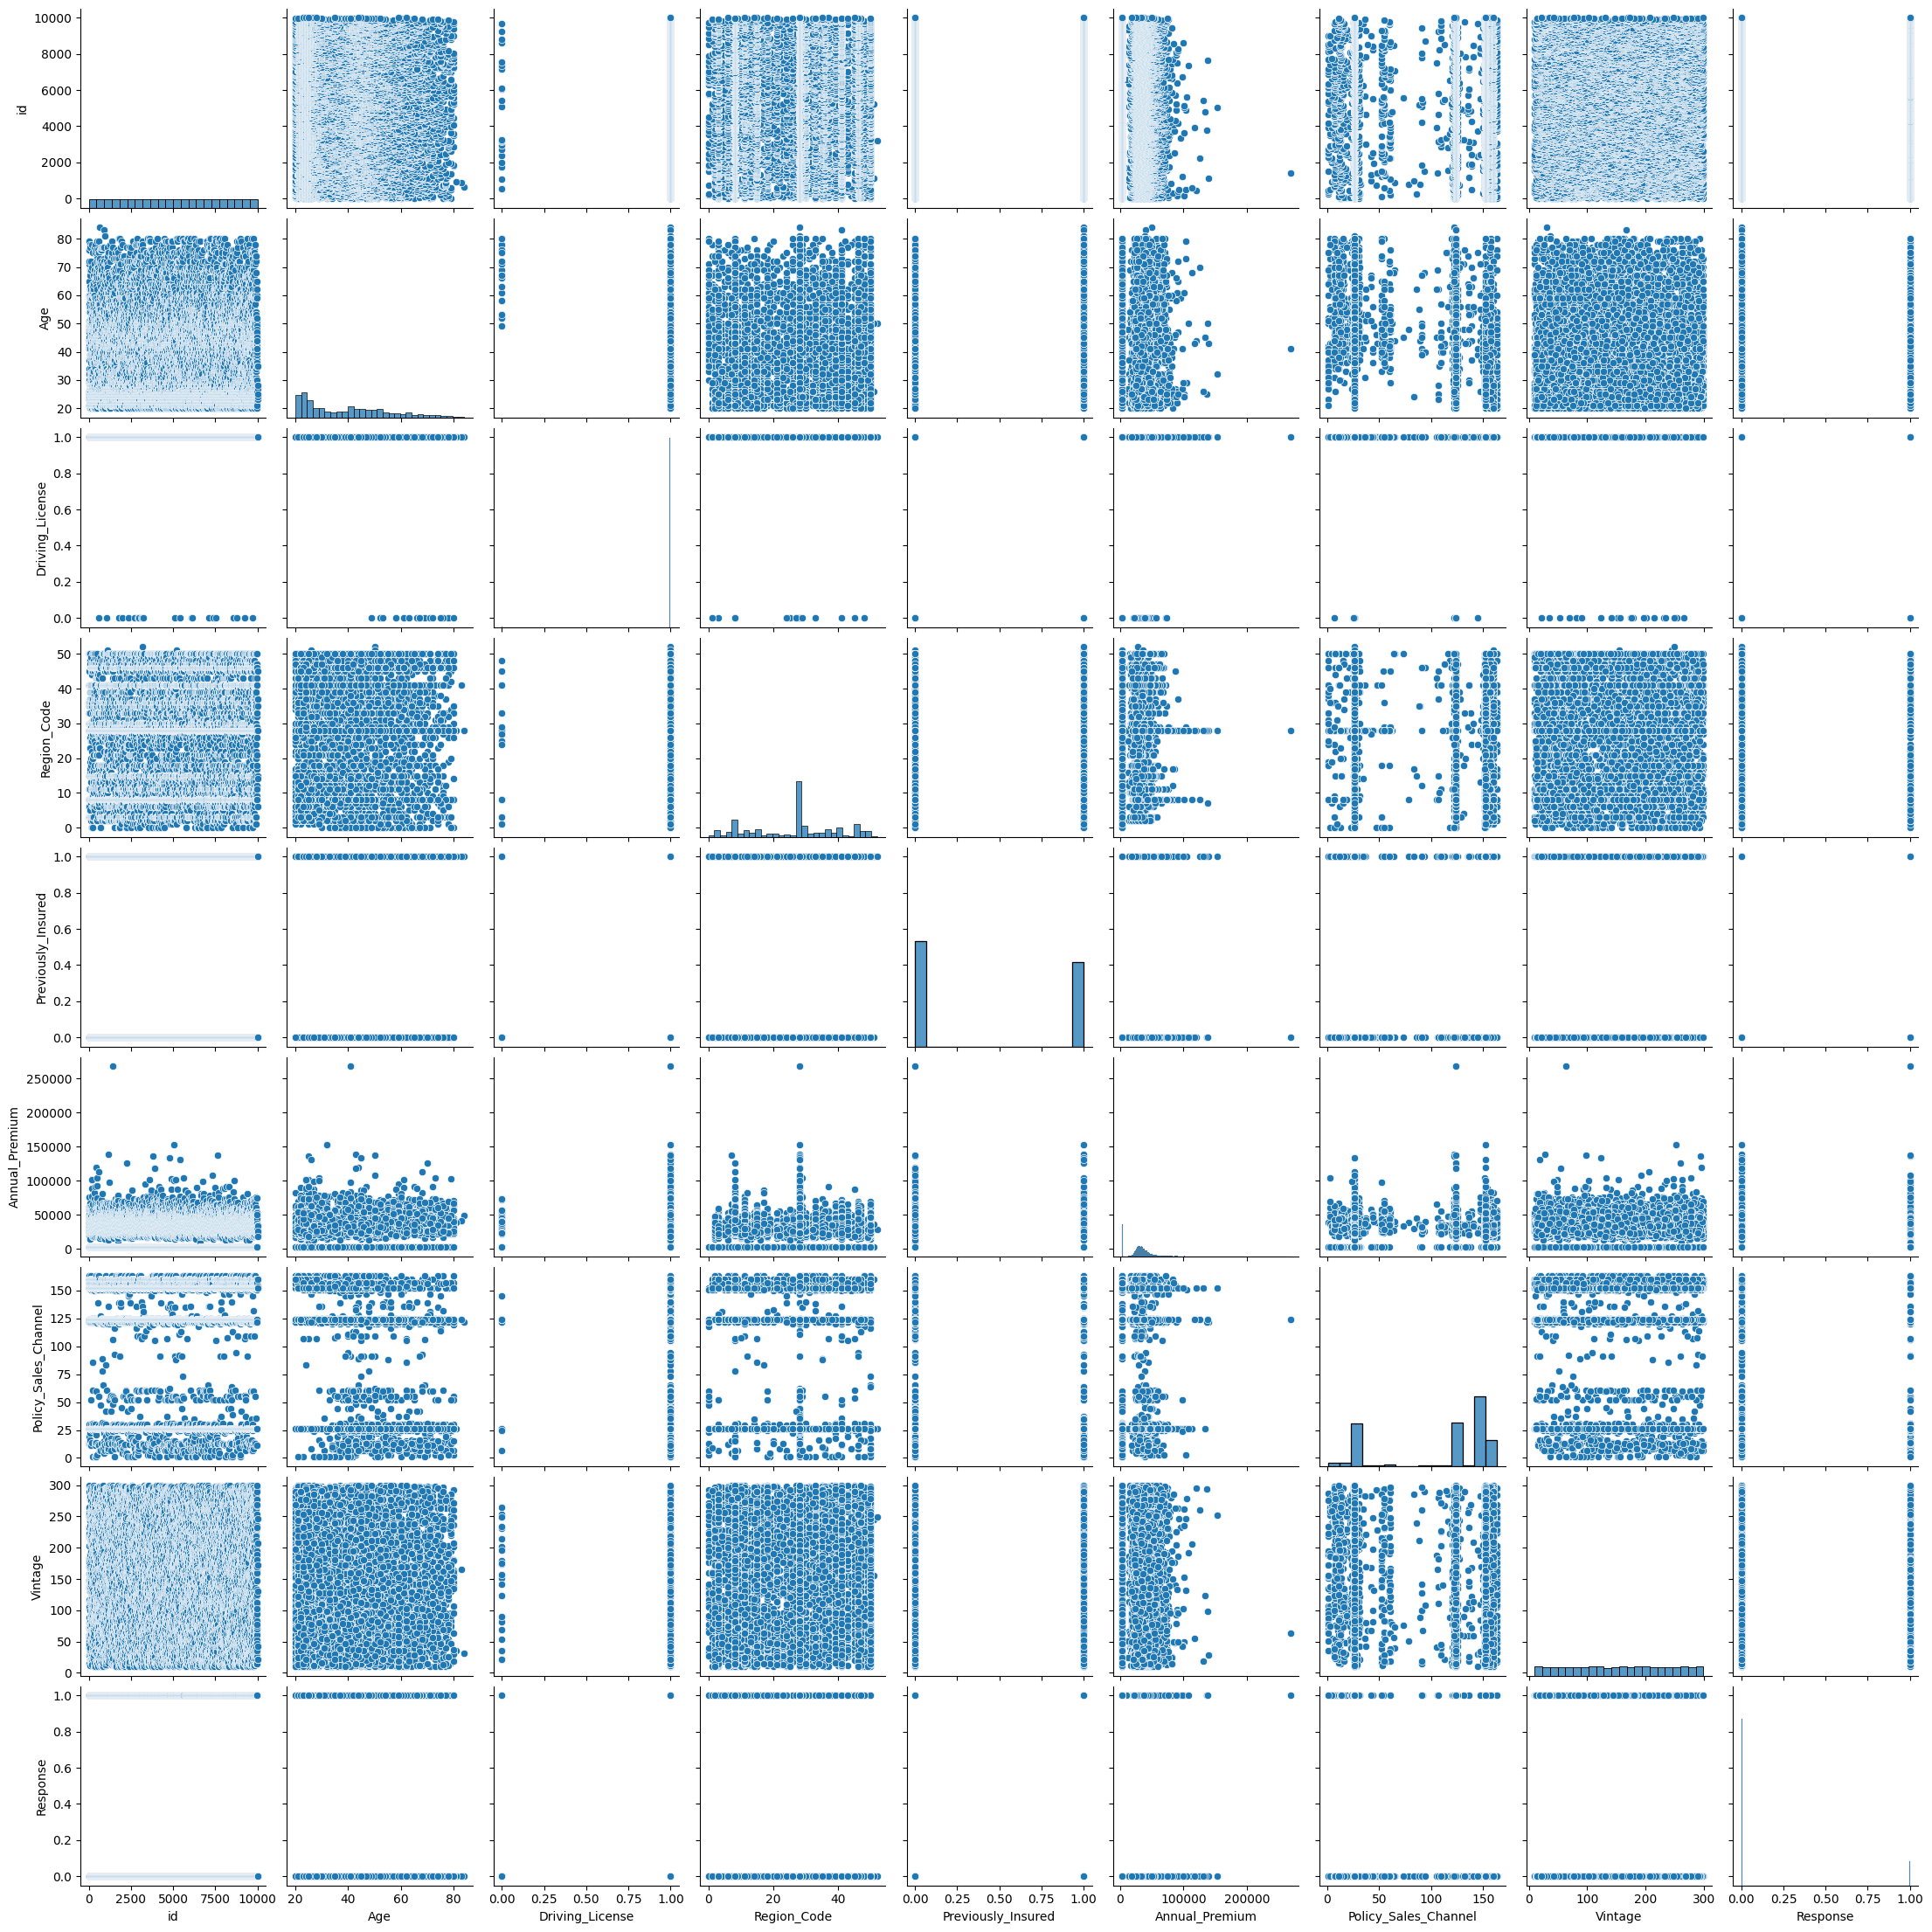

In [49]:
sns.pairplot(df[:10000])